# Students Performance Project



Dự án này được lấy dữ liệu từ  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download


1 số biến độc lập được sử dụng:

*gender: giới tính học sinh

*race/ethnicity: vùng miền học sinh

*parental level of education: trình độ học vấn của cha mẹ

*lunch: chất lượng bữa ăn trước thi

*test preparation course: hoàn thành hoặc chưa hoàn thành khóa luyện thi

Nghiên cứu nhằm mục đích chính tìm hiểu những yếu tố ảnh hướng như thế nào đến điểm số học sinh

## Data and Setup

gọi thư viện numpy,pandas

In [1]:
import numpy as np
import pandas as pd

Gọi thư viện matplotlib.pyplot , seaborn
, đổi backgroud , %matplotlib inline de thuc hien ve so do

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

đọc file dữ liệu

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.size

8000

kiểm tra dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


ĐÁNH GIÁ VỀ DỮ LIỆU:
    
    *Dữ liệu gồm có 8 trường 
    
    *Dữ liệu mỗi trường có 1000 mẫu 
    
    *Không có dữ liệu nào null 
    
    *Gồm 2 kiểu chính: object và int

xuất dữ liệu để xem: 

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Đổi tên tiêu đề để dễ thực hiện

In [6]:
df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Đếm số dữ liệu khác nhau 

In [7]:
df.nunique()

gender               2
ethnicity            5
parent_education     6
lunch                2
pre                  2
math                81
reading             72
writing             77
dtype: int64

                                          NỘI DUNG CHÍNH

I. Phân bố điểm từng môn

In bảng phân bố điểm của từng môn 

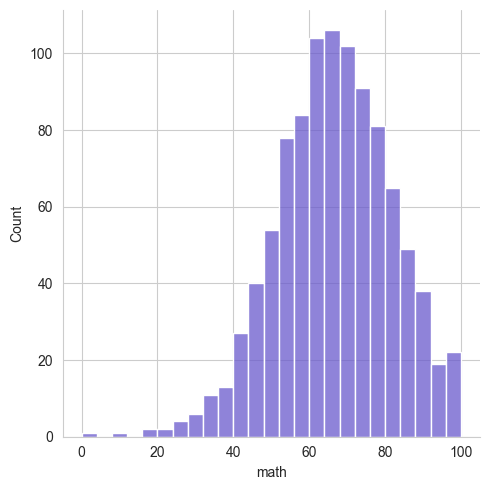

In [8]:

sns.displot(df['math'],color = 'slateblue')
plt.show()

In [9]:
df['math'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math, dtype: float64

Điểm phân bố nhiều nhất từ khoan 57-77

Điểm phân bố ít nhất từ khoan 0-40

Trung bình điểm: 66.08900

Do lech chuan: 15.16308	

In điểm môn đọc:

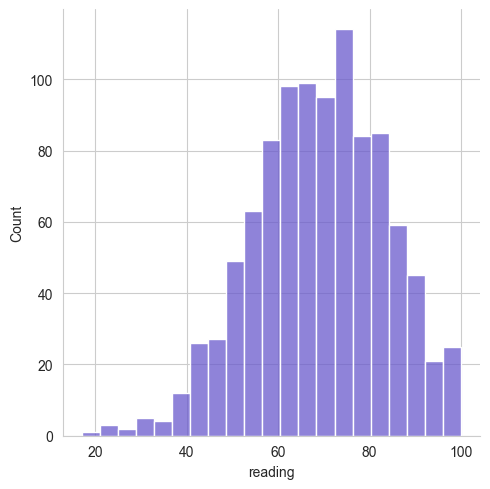

In [10]:
sns.displot(df['reading'],color = 'slateblue')
plt.show()

In [11]:
df['reading'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading, dtype: float64

Điểm phân bố nhiều nhất từ khoản 59-80


Trung bình điểm: 69.169000	

Độ lệch chuan: 14.600192		

In Bảng điểm môn viết:

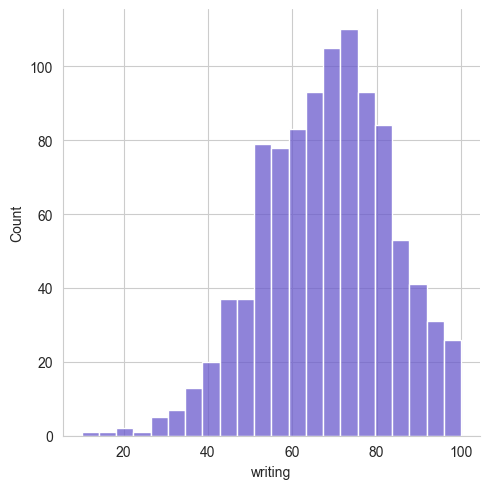

In [12]:
sns.displot(df['writing'],color = 'slateblue')
plt.show()

In [13]:
df['writing'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing, dtype: float64

Điểm phân bố nhiều nhất từ khoản 57-79

Điểm phân bố ít nhất từ khoản 0-40

Trung bình điểm: 68.054000	

Độ lệch chuan: 15.195657
		

                                          NHẬN XÉT CHUNG
                                           
    

* Điểm 3 môn phân bố khá giống nhau :
    
 đều thấp nhất ở 0-40 sau đó tăng dần dần cao nhất ở khoảng 50-90 rồi ở mức trung bình khoảng 90-100 điểm
 
 => có điểm khá ở mức nhiều , ít ở mức trung bình yếu , giỏi ở mức ít hơn khá 
 
 => đề không quá khó , phân hóa tốt
 
* Reading có trung bình điểm cao nhất :69.169 và thấp nhất là Math: 66,089

 => cho thấy học sinh có xu hướng học reading tốt hơn toán hoặc là toán đề khó hơn
 
* Nhưng std reading lại thấp nhất : 14.6 cho thấy mức độ phân hóa thấp hơn

* std cao nhất là writing: 15.195657 


Tạo ma trận nhầm lẫn, heatmap để xem quan hệ giữa các điểm

C:\Users\ACER\AppData\Local\Temp\ipykernel_4456\2751251209.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


<Figure size 1600x900 with 0 Axes>

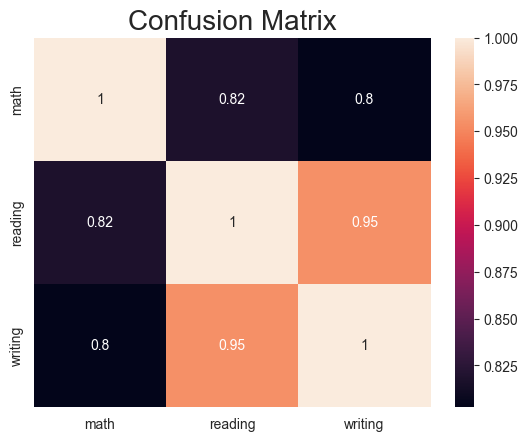

<Figure size 1600x900 with 0 Axes>

In [14]:

sns.heatmap(df.corr(),annot=True);
plt.title("Confusion Matrix", fontsize=20)
plt.figure(figsize=(16,9))

Nhận xét: Điểm có quan hệ với nhau. Đặc biệt điểm này cao có xu hướng dẫn đến điểm khác cao

II. Ảnh hưởng của giới tính đến điểm

Bảng số lượng nam nữ: 

in ra pie chart 

female    518
male      482
Name: gender, dtype: int64


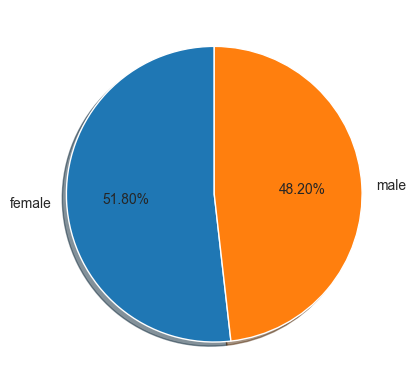

In [15]:
gender_counts=df['gender'].value_counts()
print(gender_counts)
plt.pie(gender_counts,
        labels=gender_counts.index,autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.show()

tính % chênh lệch

In [16]:
print(abs(len(df[df['gender']=='male'])-len(df[df['gender']=='female']))/1000*100)

3.5999999999999996


Tỉ lệ nữ hơn nam 3,6% 

in ra bảng 

C:\Users\ACER\AppData\Local\Temp\ipykernel_4456\4054825666.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


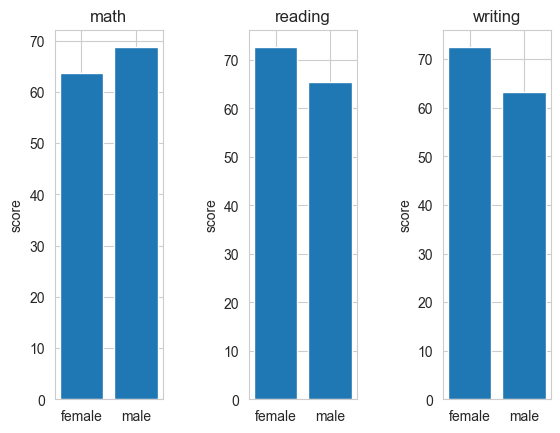

In [17]:
fig, ax = plt.subplots()
#Lặp 3 lần in ra lần lượt 3 sơ đồ cho 3 loại điểm
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe() 
    #tính các thông số cơ bản của 3 cột điểm dự theo nam nữ

    plt.bar(gender_df.index,gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    #Tạo ra biểu đồ dạng thanh với chiều dài là điểm trung bình , ngang là 2 cột nam nữ
plt.show()

Nhận xét:
    
    * Chúng ta thấy được về môn toán thì nam có thể hiện tốt hơn điểm trugn bình cao hơn nhưng lại kém hơn về phần reading và writing
    
    => Tư duy logic nam có lợi thế hơn ( trong khảo sát) nhưng thấp hơn về reading và writing đòi hỏi tính cẩn thận, chăm chỉ hơn

III.Ảnh hưởng của trình độ học vấn của cha mẹ

In ra bảng xem xét % cấu thành parent_education

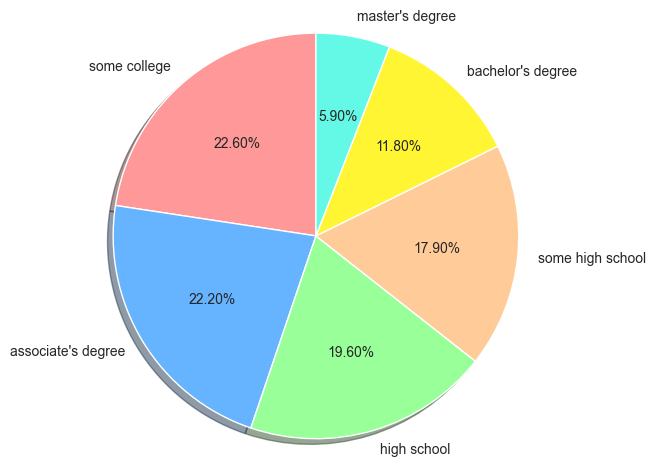

In [18]:
#lay thong tin cot parent_education
df_parent = pd.DataFrame(df['parent_education'].value_counts(normalize=True) )
labels=[]
sizes=[]
#lay gia tri cho 2 list labels va size voi kieu du lieu lan luot la str va float
for i in df_parent.index:
        labels.append(str(i))
for i in df_parent.values:
        sizes.append(float(i))
#mau

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fff533','#64f9e6']
#ve so do
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

Trình độ học vấn : master > bacherlor > associate > some collage > highschool > some highschool 
Nhận xét: 

trình độ học vấn cao nhất là master's degree chiếm nhỏ nhất : 5,9%

Tiếp theo là bacherlor's degree : 11,8 

Lớn nhất là some collage và associate's : 22,6 % và 22,2% ( học vấn ở mức trung bình )

=> trình độ học vấn bố mẹ của dữ liệu phần lớn ở mức trung bình tốt


                                    Ảnh hưởng của trình độ học vấn và điểm:

Xem thông số

In [19]:
df['parent_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_education, dtype: int64

In ra sơ đồ cột ảnh hưởng của parent_education đến các điểm 

Điểm toán

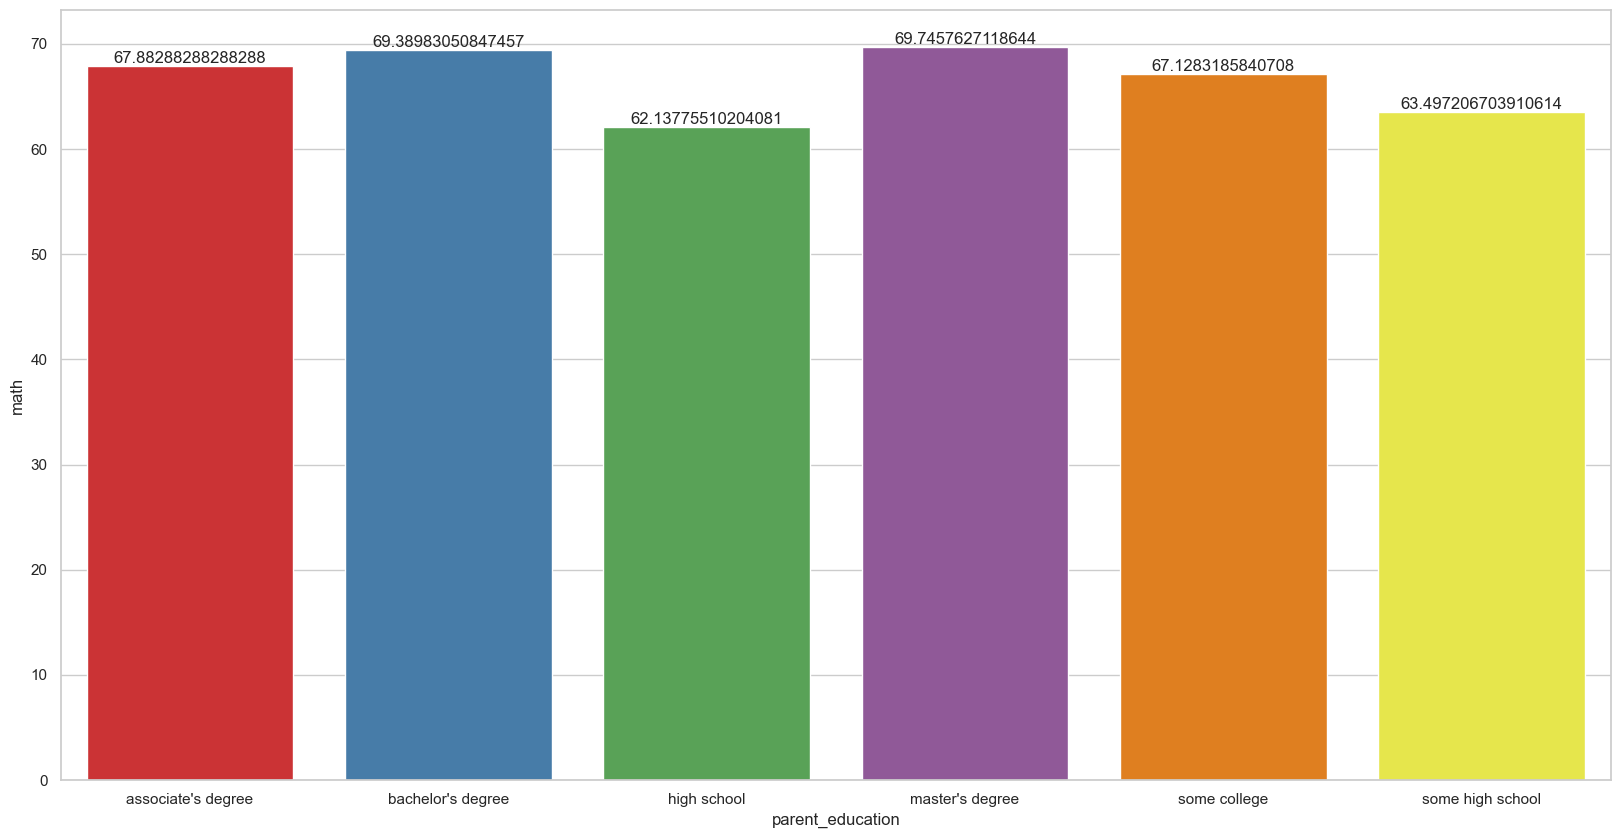

In [20]:
graph = df.groupby(["parent_education"],as_index = False)['math'].mean()
plt.figure(figsize = (20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="parent_education", y="math", data=graph,palette = 'Set1')
for i, val in enumerate(graph['math'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

Điểm reading:

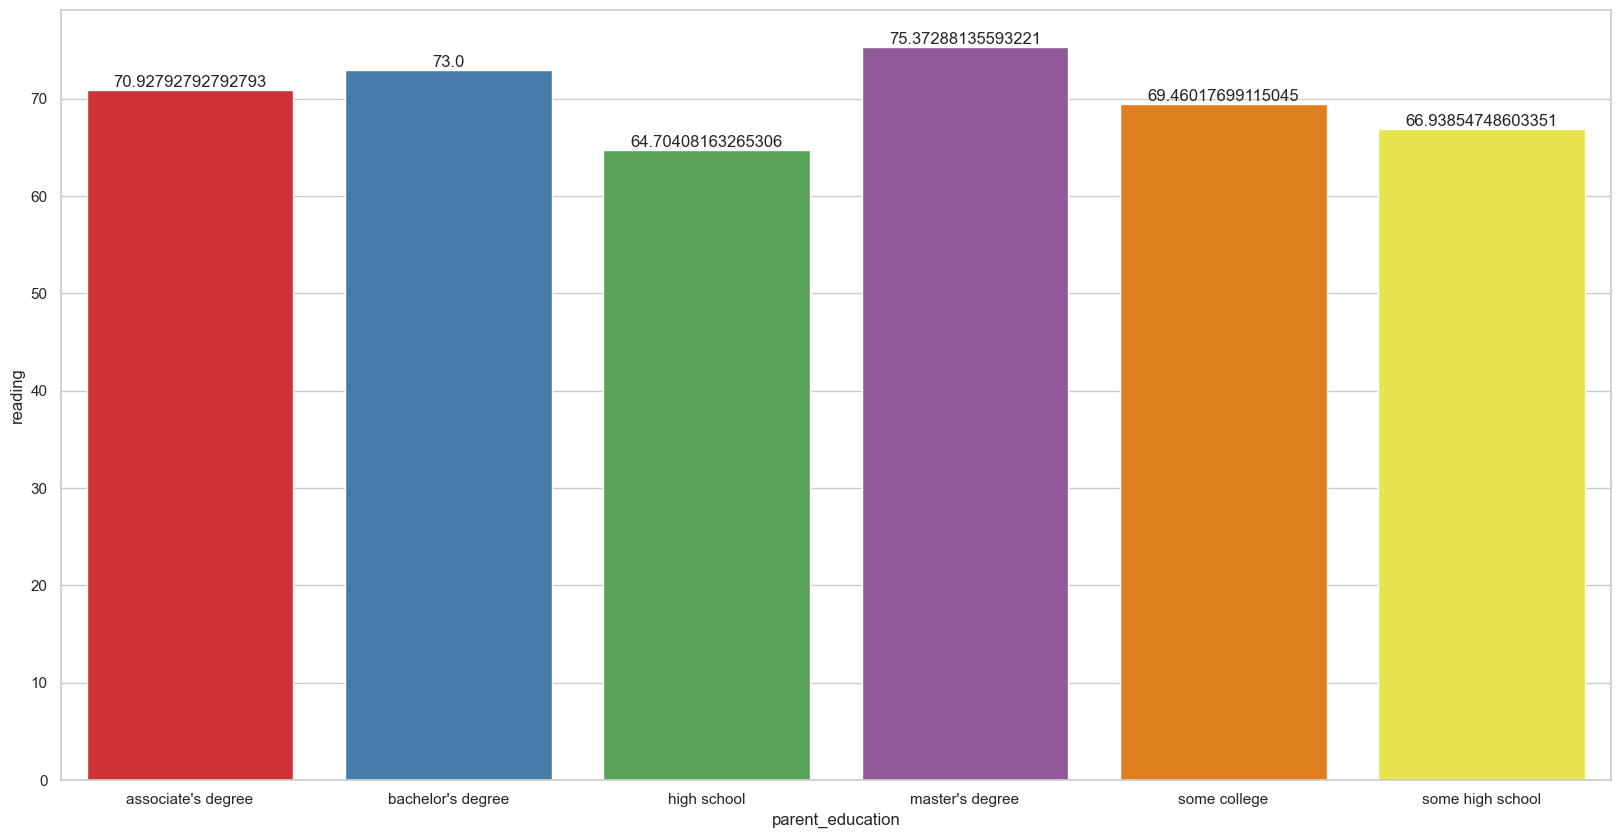

In [21]:
graph = df.groupby(["parent_education"],as_index = False)['reading'].mean()
plt.figure(figsize = (20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="parent_education", y="reading", data=graph,palette = 'Set1')
for i, val in enumerate(graph['reading'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

Writing

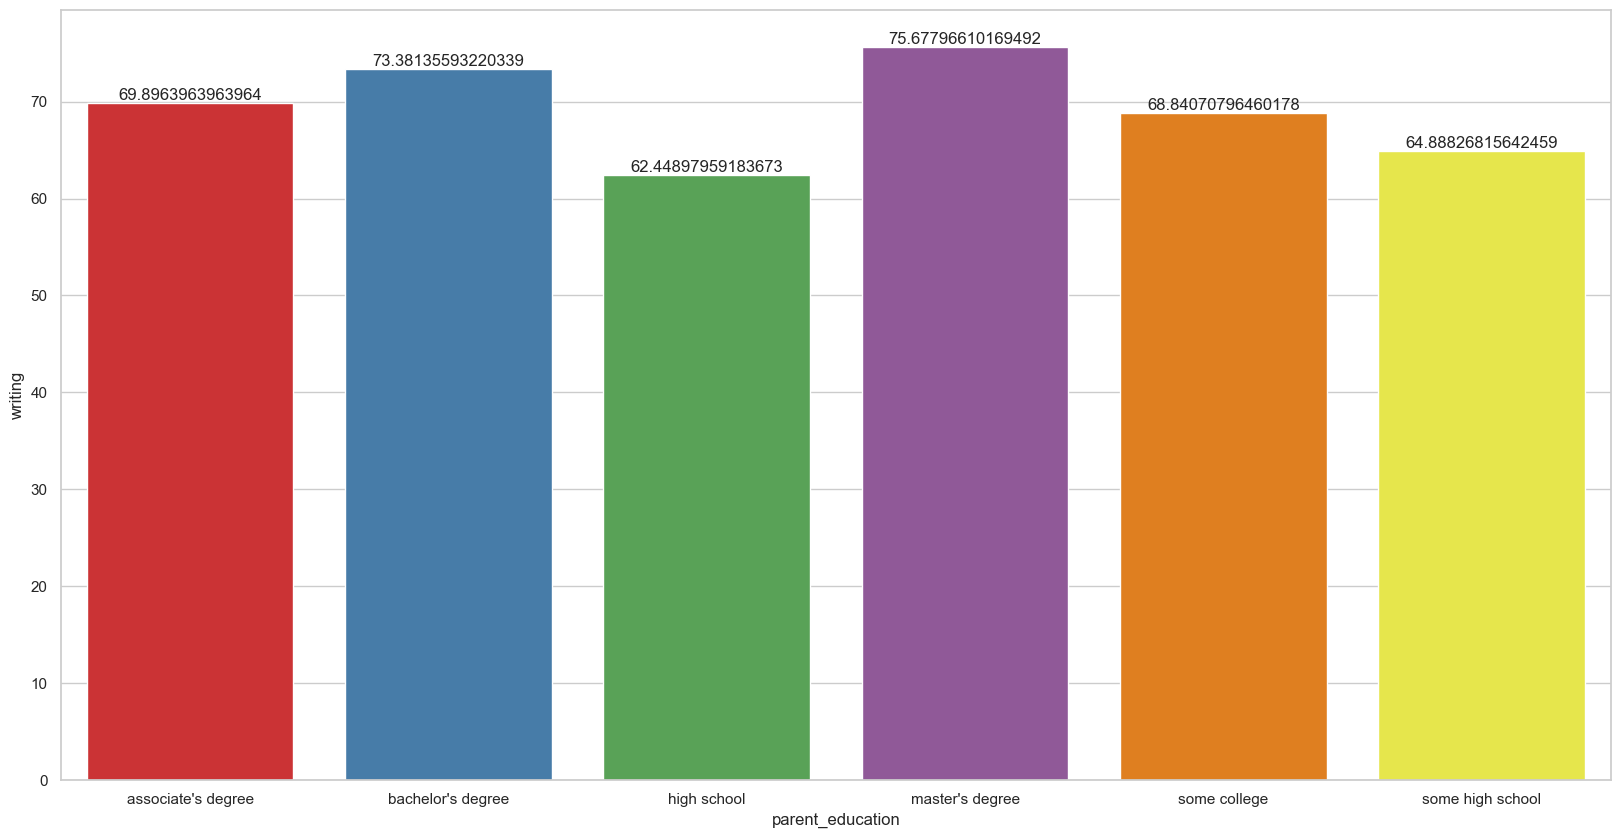

In [22]:
graph = df.groupby(["parent_education"],as_index = False)['writing'].mean()
plt.figure(figsize = (20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="parent_education", y="writing", data=graph,palette = 'Set1')
for i, val in enumerate(graph['writing'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

NHẬN XÉT CHUNG: 
    
    Về tổng thể cha mẹ có con trình độ học vấn cao hơn thì có xu hướng đạt điểm tốt hơn . 

IV. Ảnh hưởng của bữa ăn

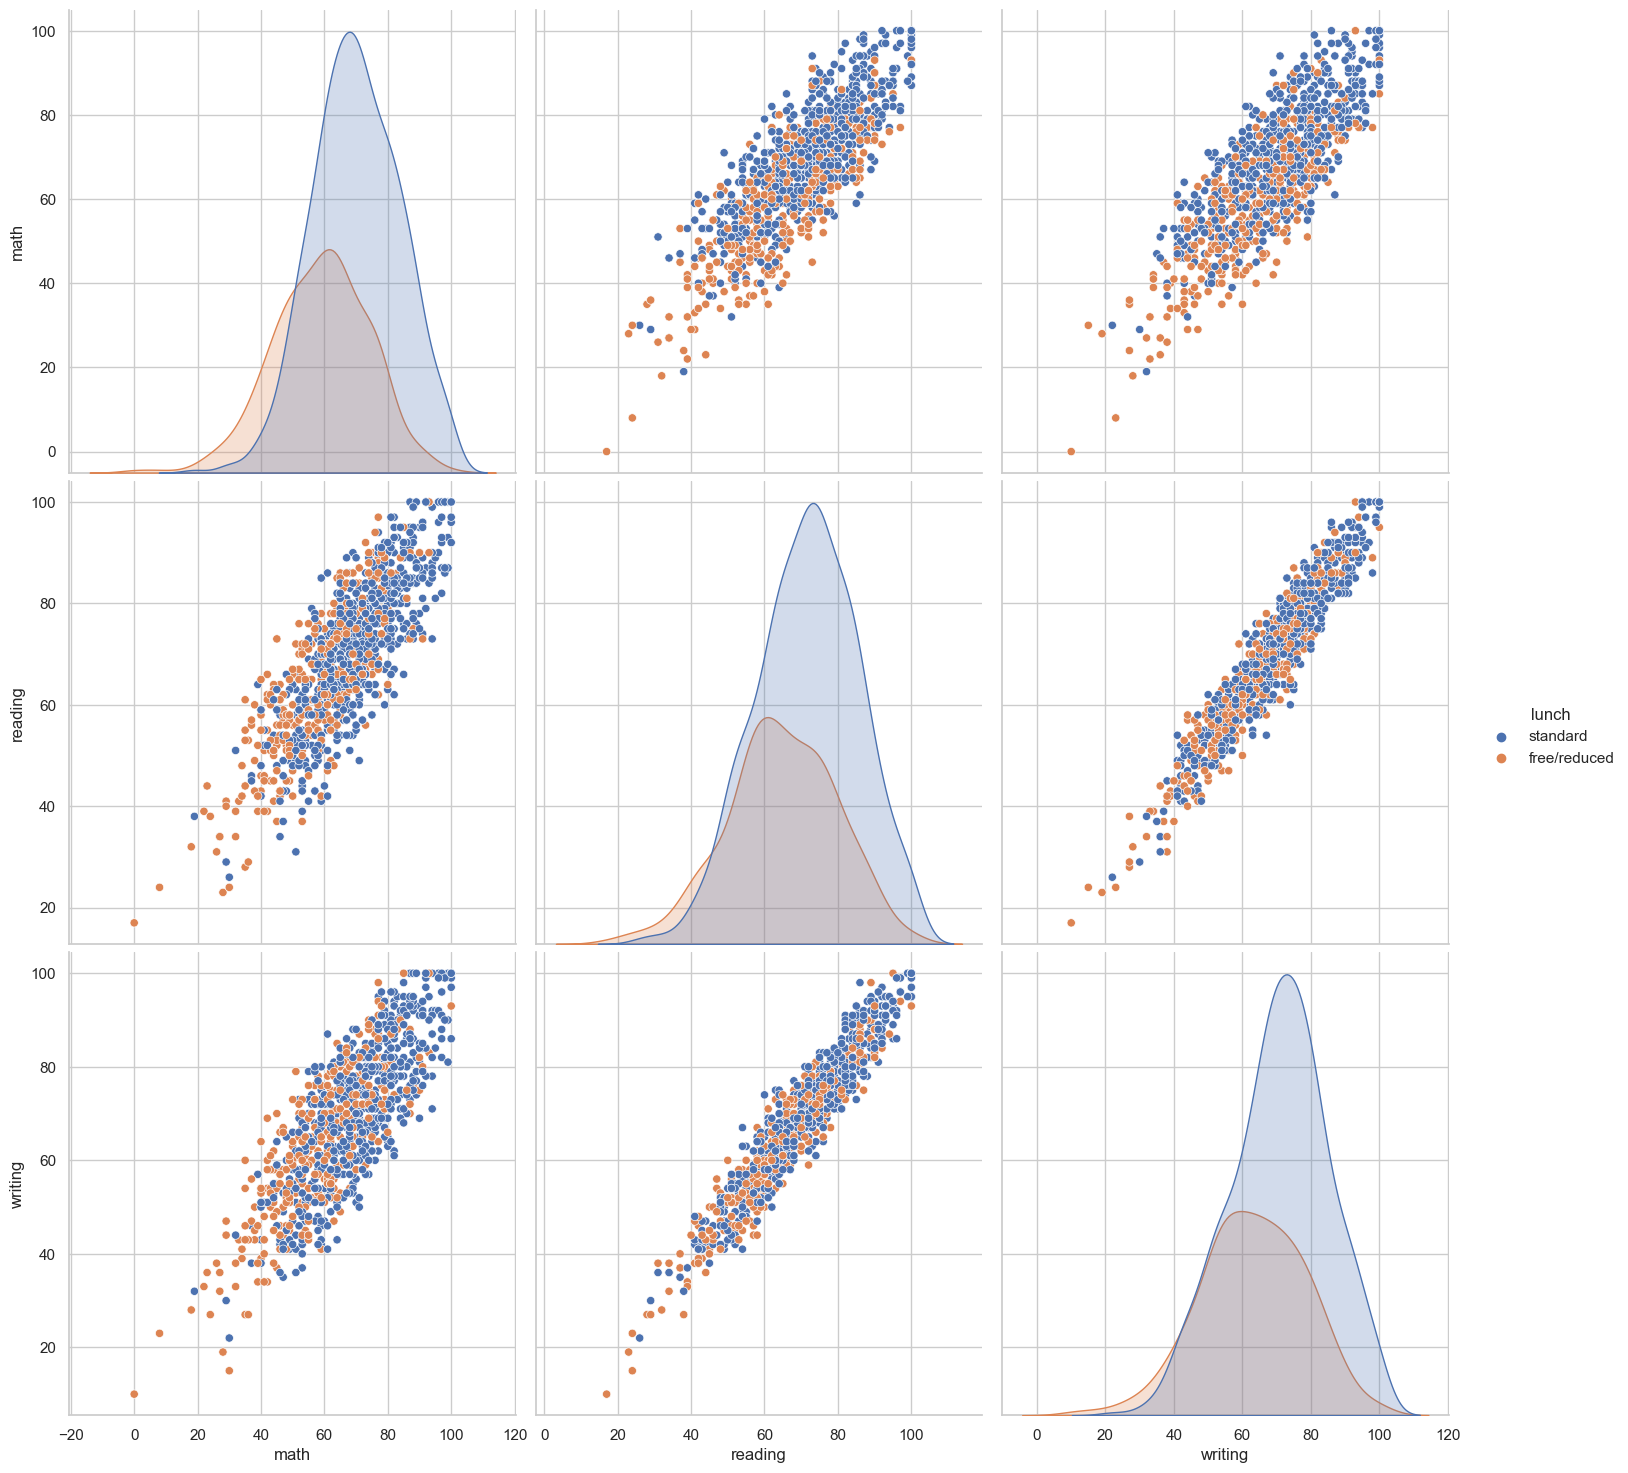

In [23]:
fig = sns.pairplot(df[["math", "reading", "writing", "lunch"]], hue="lunch", height=5);


NHẬN XÉT:
    
    Biểu đồ có thế cho ta 2 nhận xét chính :
        
        * Về sự phân bố của các chấm màu đỏ so với màu xanh , và biểu đồ miền :
            
            Ta thấy tỉ lệ học sinh được ăn trưa chất lượng trước kiểm tra chiếm tỉ lệ cao hơn hẳn so với học sinh ăn trưa chất lượng kém 
            
            Thêm nữa, chấm xanh phân bố cao hơn chấm đỏ cho thấy học sinh có bữa trưa tốt hơn thì có xu hướng điểm tốt hơn, tương tự với biểu đồ miền
            
        * Về sự phân bố điểm:
            
            Ta thấy những biểu đồ có toán và 1 môn khác thì các chấm có xu hướng xếp tách ra khỏi đường chéo chính và rời rạc 
            
            Với những biểu đồ không có toán thì các chấm phân bố gần nhau hơn và xát dọc theo đường chéo
            
            => Môn toán ít liên quan tới các môn khác , và 2 môn đọc , viết có quan hệ với nhau ( nếu môn này điểm cao môn kia cũng có xu hướng được điểm cao )

V. Ảnh hưởng của dân tộc 

Trước tiên xem xét ảnh hưởng của dân tộc đến trình độ học vấn của phụ huynh

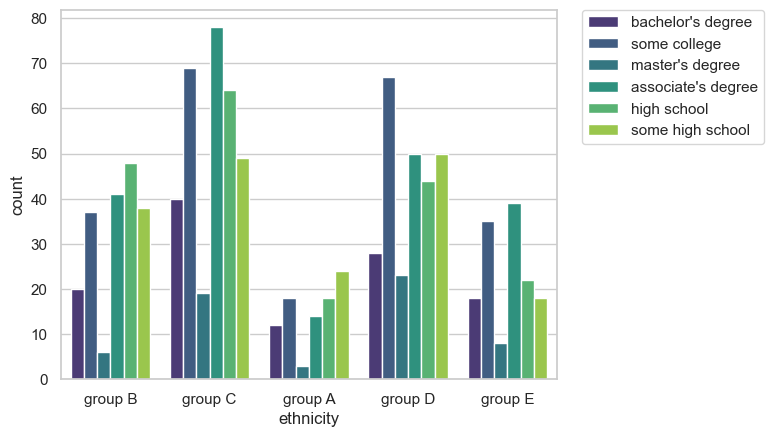

In [24]:

sns.countplot(x='ethnicity',data=df,hue='parent_education',palette='viridis')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

NHẬN XÉT:

B C E có cấu trúc tương tự nhau

master ít nhất

Cao nhất B(high school), C(ass's) , A(some high school), D(some college), E(ass's)

Ảnh hưởng của dân tộc đến điểm toán:

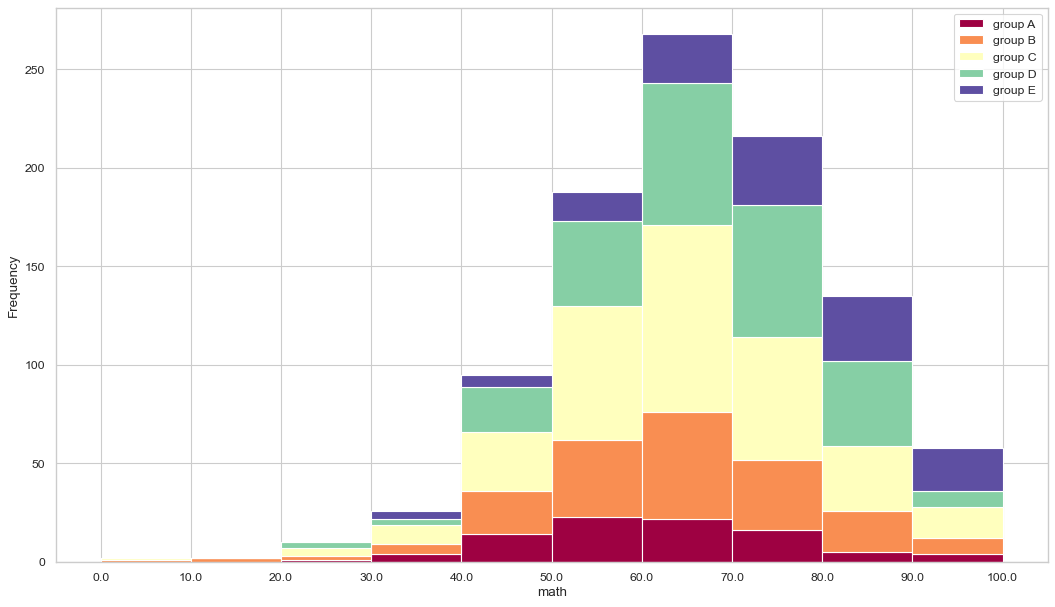

In [25]:

x_var = 'math'
groupby_var = 'ethnicity'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]


plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins[::1], labels=[round(b,1) for b in bins[::1]])
plt.show()

Điểm đọc:

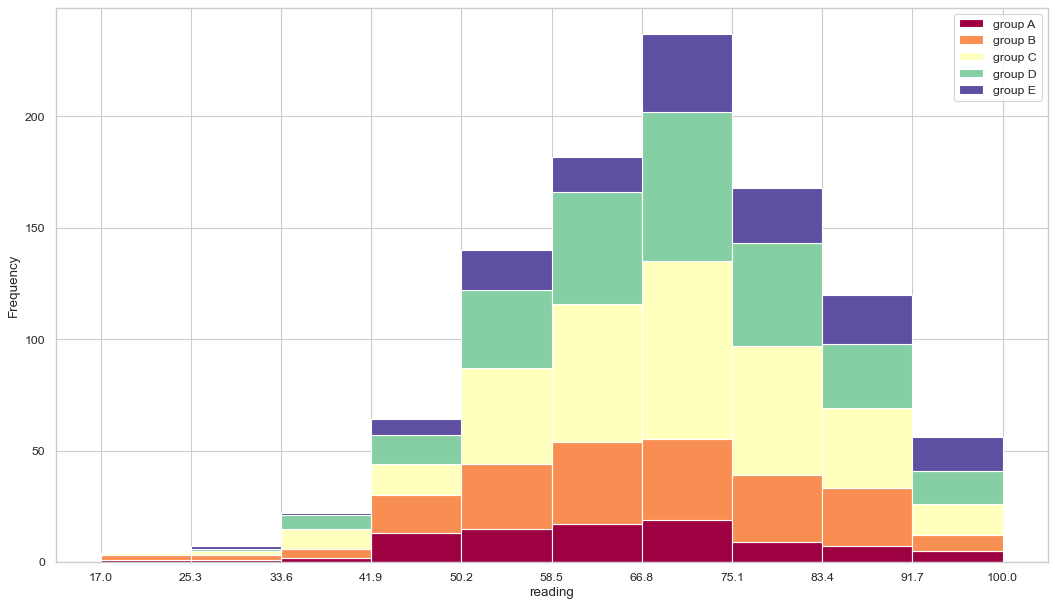

In [26]:
x_var = 'reading'
groupby_var = 'ethnicity'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

#ve 
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins[::1], labels=[round(b,1) for b in bins[::1]])
plt.show()

Điểm viết: 

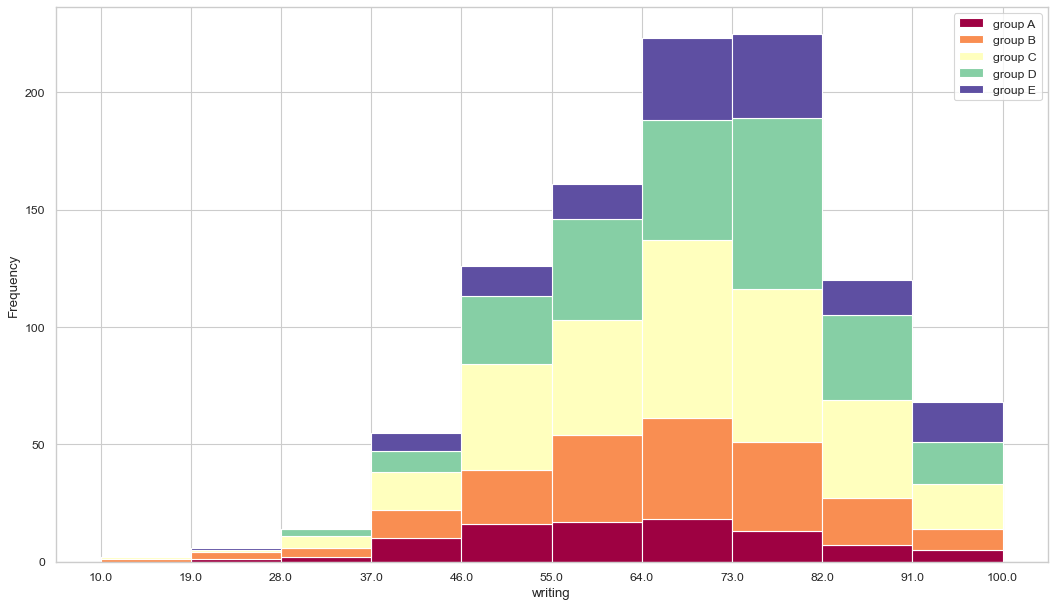

In [27]:
x_var = 'writing'
groupby_var = 'ethnicity'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

#ve 
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins[::1], labels=[round(b,1) for b in bins[::1]])
plt.show()

Nhận xét riêng:

     Xet % cac phan dan toc den phan bo diem

NHẬN XÉT CHUNG:
  
     Dan toc co xu huong diem cao hon
      

VI. Ảnh hưởng của pre test

In ra bieu đồ để xem xét mức độ ảnh hưởng của pre test đến từng điểm

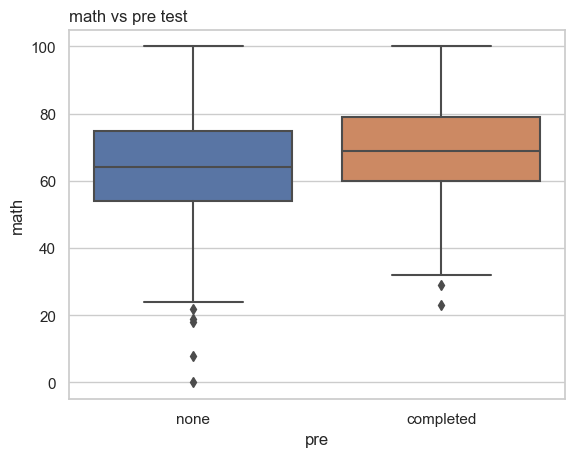

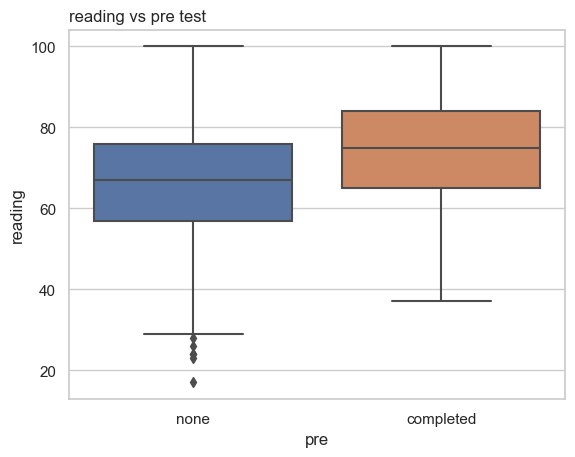

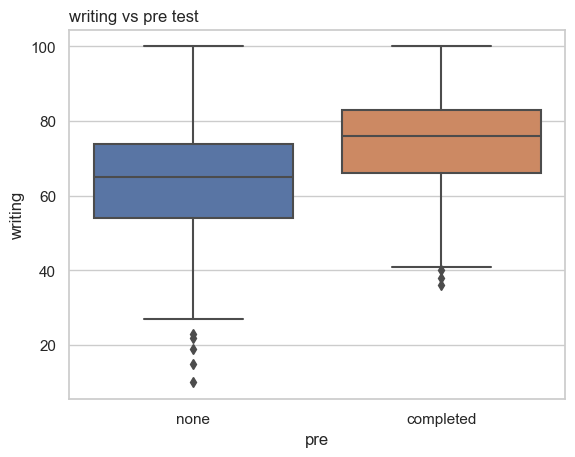

In [28]:
for item in df.columns[-3:]:
    sns.boxplot(x=df["pre"], y=df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

Nhận xét:
    
    Học sinh có hoàn thành bài thi pre thì có xu hướng điểm cao hơn các học sinh khác

NHẬN XÉT:

VII. Tổng kết:

    * Biết được sự ảnh hưởng của các nhân tố đến điểm học sinh 
  
    * Thống kê được sự phân bố, thành phần % của các thành phần dữ liệu
  
    * Mối quan hệ giữa 1 số thành phần
  
    * Mối quan hệ giữa các điểm